In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Supplementary 2.csv')

# Check the first few rows of the dataset
print(data.head())


   S.NO   DB_ID DIS_CLASS   GENE  PUBMED.ID LACKASSO  \
0     1  bc_id1    CANCER  MYCL1    1345822        Y   
1     2  bc_id2    CANCER   HRAS    2086347        Y   
2     3  bc_id3    CANCER  ERBB2    3664511        Y   
3     4  bc_id4    CANCER   TP53    7524772        B   
4     5  bc_id5    CANCER    RB1    7615356        Y   

                                               TITLE  YEAR CONCLUSION  \
0  Association between restriction fragment lengt...  1992        NaN   
1  Analysis of the association of inherited predi...  1990        NaN   
2  Association of multiple copies of the c-erbB-2...   NaN        NaN   
3  Quantitative analysis of mutant p53 protein in...  1994        NaN   
4  Association between RB-1 gene alterations and ...  1995        NaN   

                                        REF_SENTENCE ASSOCIATION_CLASS  \
0  No differences in the patterns of L-myc RFLP w...                 N   
1  No absolute relationship between the genetic p...                 N   
2 

In [20]:
# Define the features (X) and the target variable (y)
# Assuming 'ASSOCIATION_CLASS' is a categorical column
X = pd.get_dummies(data[['YEAR', 'WEIGHT','GENE','REF_GENE','REF_SENTENCE','TITLE','DIS_CLASS','CONCLUSION']])

# Continue with the rest of your code
# Adjust the feature columns as needed
y = data['ASSOCIATION_CLASS']  # Replace 'CONCLUSION' with the actual target column


In [21]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [23]:
# Train the model on the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [24]:
# Make predictions on the testing data
y_pred = rf_model.predict(X_test)


In [25]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8394607843137255


In [26]:
lvl =['A', 'ANF', 'MC', 'N','NR', 'PNF', 'X', 'Y']


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    x = df_cm
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

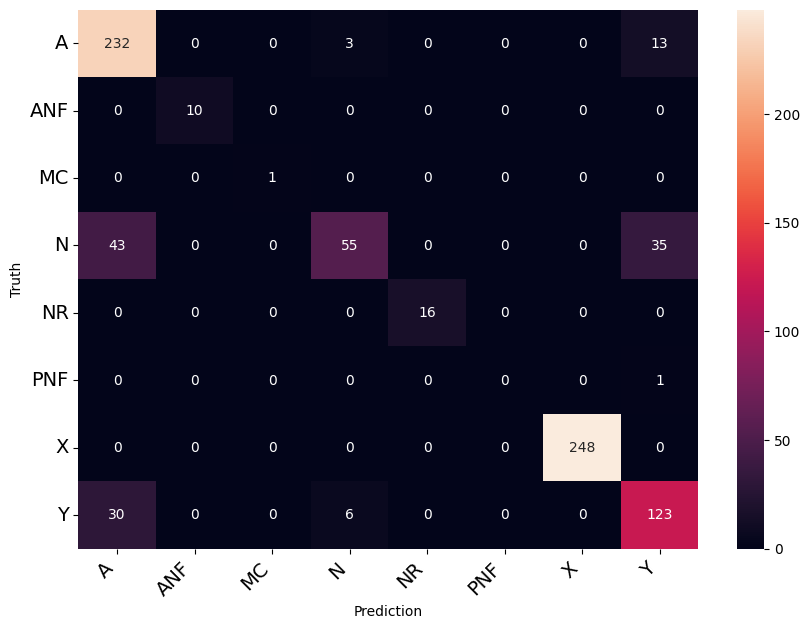

In [29]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred,labels = lvl)

print_confusion_matrix(conf_matrix,lvl)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

# Calculate additional metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           A       0.76      0.94      0.84       248
         ANF       1.00      1.00      1.00        10
          MC       1.00      1.00      1.00         1
           N       0.86      0.41      0.56       133
          NR       1.00      1.00      1.00        16
         PNF       0.00      0.00      0.00         1
           X       1.00      1.00      1.00       248
           Y       0.72      0.77      0.74       159

    accuracy                           0.84       816
   macro avg       0.79      0.77      0.77       816
weighted avg       0.85      0.84      0.83       816



c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif